Football (Semantic Segmentation) 
Dataset source : [Kaggle Link to dataset](https://www.kaggle.com/datasets/sadhliroomyprime/football-semantic-segmentation/data)

100 frames of pixel-perfect semantic segmentation with 11 classes.
- developed for the FIFA 2022 in Qatar 
- 100 frames taken at every 12th frame (match between Real Madrid and Manchester United) 

11 standard classes: `Goal Bar`, `Referee`, `Advertisement`, `Ground`, `Ball`, `Coaches and Officials`, `Audience`, `Goalkeeper A`, `Goalkeeper B`, `Team A`, and `Team B`. 

- used superAnnotate's pixel editor to label and classify images 
- dataset created by ACME AI Ltd. 
- contains COCO for optimized interoperability and visual understanding.



In [5]:
import cv2 
import numpy as np 
import torch
import glob 
import matplotlib.pyplot as plt 

- images are in `jpg` 
- masks are in `png`, with suffix `__fuse`

In [6]:
image_path_list = glob.glob('./images/*.jpg')
mask_path_list = glob.glob('./images/*__fuse.png')

Total number of images

In [7]:
f'total number of images {len(image_path_list)} and respective mask {len(mask_path_list)}'

'total number of images 100 and respective mask 100'

./images\Frame 1  (17).jpg___fuse.png


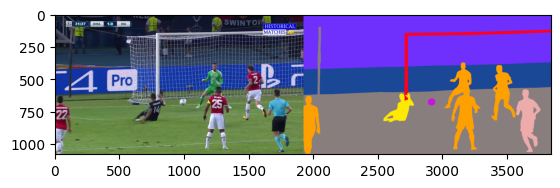

In [8]:
num = 9
print(mask_path_list[num])
mask = cv2.cvtColor(cv2.imread(mask_path_list[num]), cv2.COLOR_BGR2RGB) # cv2.COLOR_BGR2HSV) # [:,:,::-1]
image = cv2.cvtColor(cv2.imread(image_path_list[num]), cv2.COLOR_BGR2RGB) # cv2.COLOR_BGR2HSV) # [:, :, ::-1]
plt.imshow(np.hstack([image,mask]) )

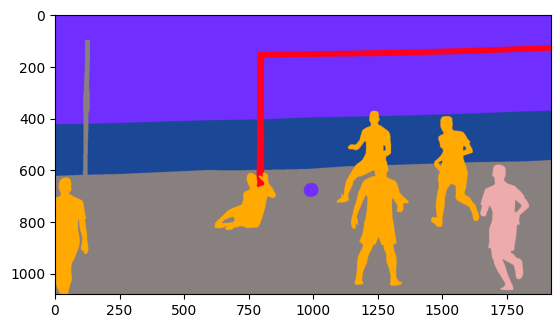

In [48]:
np_image = mask.reshape(-1, 3)
no_of_colors =7
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 100, 0.85)
retval, labels, centers = cv2.kmeans(np.float32(np_image), no_of_colors, bestLabels=None, 
    criteria=criteria, attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
seg_data = centers[labels.flatten()] # mapping labels to center points (RGB values)

# reshape data into original
seg_image = seg_data.reshape((image.shape))
plt.imshow(seg_image)

In [42]:
unique_valus = np.unique(seg_data.reshape(-1, 3), axis=0)

In [43]:
unique_valus

array([[  0,   0,   0],
       [ 27,  71, 151],
       [111,  48, 254],
       [136, 127, 127],
       [201,  19, 223],
       [238, 171, 171],
       [255,   0,  29],
       [255, 169,   1]], dtype=uint8)

| Class | RGB Value |
| --------- | --------- |
| advertisement | [ 26,  71, 151] |
| Audience | [111,  48, 253] |
| Team A | [255,   0,  29] |





In [9]:

def rbg_to_gray(number = 0):
    pixel_other_than_color_class_mapping = False
    mask_rgb = cv2.cvtColor(cv2.imread(mask_path_list[number]), cv2.COLOR_BGR2RGB)
    color_class_mapping = {
        (137, 126, 126) : 0, # ground
        (27,  71, 151) : 1, # advertisement
        (111,  48, 253): 2, # audience
        (255,   0, 29) : 3, # football post
        (255, 160, 1) : 4, # team A # orange | goal keeper in green of MU
        (255, 159, 0) : 5, #  goal keeper in green of MU keeper
        (254, 233, 3) : 6, # team B # yellow | goal keeper in yellow of RMA
        (255, 235, 0) : 7, #  goal keeper in yellow of RMA
        (238, 171, 171) : 8, # refree pink
        (201,  19, 223) : 9, # football
    }
    mask_gray = np.zeros((mask_rgb.shape[0], mask_rgb.shape[1]), dtype=np.uint8)
    

    for i in range(mask_rgb.shape[0]):
        for j in range(mask_rgb.shape[1]):
            pixel_color  = tuple(mask_rgb[i, j])
            if pixel_color in color_class_mapping:
                mask_gray[i, j] = color_class_mapping[pixel_color]
            else: 
                print(pixel_color)
                pixel_other_than_color_class_mapping = True
                mask_gray[i, j] = color_class_mapping[(111,  48, 253)]
    cv2.imwrite(mask_path_list[number].replace('images', 'masks'), mask_gray)

    if pixel_other_than_color_class_mapping:
        return mask_path_list[number]
    else : 
        return ''
    # add_ = np.ones_like(mask_gray) * 100
    # cv2.imshow('test', cv2.resize(mask_gray * 30,  (mask_rgb.shape[1]//2, mask_rgb.shape[0]//2)))
    # cv2.waitKey(0)
    # cv2.destroyAllWindows() 
    ...
# rbg_to_gray()

[ 26  71 151]
[111  48 254]
[255   0  29]
[255 159   0]
[255 232   3]


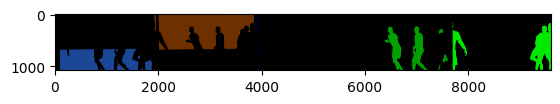

In [156]:
image1 = cv2.cvtColor(cv2.imread(mask_path_list[0]), cv2.COLOR_BGR2RGB)
from copy import deepcopy
hstack_segments = []
for rgb_pxl in unique_valus:
    print(rgb_pxl)
    copy_image = np.zeros_like(image1)

    # pxl_value = np.array([ 23, 254, 255], dtype=np.uint8)
    tolerance = 5
    
    copy_image[((rgb_pxl - tolerance) < image1[:,:]) & (image1 < (rgb_pxl + tolerance))] = image1[((rgb_pxl - tolerance) < image1 ) & (image1 < (rgb_pxl + tolerance))]
    # copy_image = cv2.cvtColor(copy_image, cv2.COLOR_RGB2GRAY)
    # _, copy_image= cv2.threshold(copy_image, 5, 255, cv2.THRESH_BINARY)

    hstack_segments.append(deepcopy(copy_image))

hstack = np.hstack(hstack_segments)
    # copy_image[image1 == pxl_value] = image1[image1 == pxl_value]
plt.imshow(hstack)

Here, we have seperated the 5 classes with the RGB values 

## Using HSV Value to segment

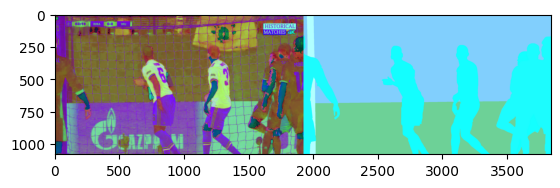

In [132]:
mask = cv2.cvtColor(cv2.imread(mask_path_list[0]), cv2.COLOR_BGR2HSV) # [:,:,::-1]
image = cv2.cvtColor(cv2.imread(image_path_list[0]), cv2.COLOR_BGR2HSV) # [:, :, ::-1]
plt.imshow(np.hstack([image,mask]) )

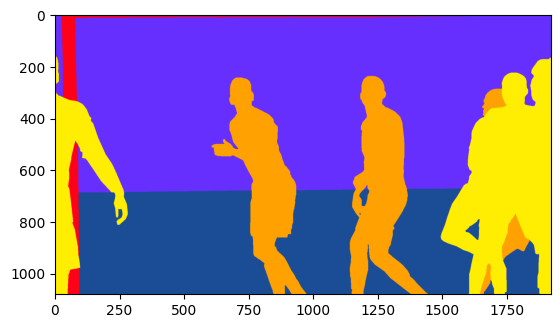

In [88]:
np_image = mask.reshape(-1, 3)
no_of_colors =5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 100, 0.85)
retval, labels, centers = cv2.kmeans(np.float32(np_image), no_of_colors, bestLabels=None, 
    criteria=criteria, attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
seg_data = centers[labels.flatten()] # mapping labels to center points (RGB values)

# reshape data into original
seg_image = seg_data.reshape((image.shape))
plt.imshow(cv2.cvtColor(seg_image, cv2.COLOR_HSV2RGB))

In [90]:
unique_valus = np.unique(seg_data.reshape(-1, 3), axis=0)
unique_valus

array([[ 19, 254, 255],
       [ 28, 252, 255],
       [108, 208, 151],
       [128, 207, 254],
       [177, 255, 255]], dtype=uint8)

[ 19 254 255]
[ 28 252 255]
[108 208 151]
[128 207 254]
[177 255 255]


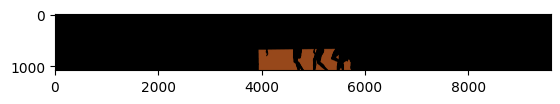

In [97]:
image1 = cv2.cvtColor(cv2.imread(mask_path_list[0]), cv2.COLOR_BGR2HSV)
hstack_segments = []
for pxl_value in unique_valus:
    print(pxl_value)
    copy_image = np.zeros_like(image1)

    # pxl_value = np.array([ 23, 254, 255], dtype=np.uint8)
    tolerance = 2

    copy_image[((pxl_value - tolerance) < image1 ) & (image1 < (pxl_value + tolerance))] = image1[((pxl_value - tolerance) < image1 ) & (image1 < (pxl_value + tolerance))]
    hstack_segments.append(copy_image.copy())

hstack = np.hstack(hstack_segments)
    # copy_image[image1 == pxl_value] = image1[image1 == pxl_value]
plt.imshow(cv2.cvtColor(hstack, cv2.COLOR_HSV2BGR))

Resize
HorizontalFlip
VerticalFlip
ChannelShuffle
ToTensorV2


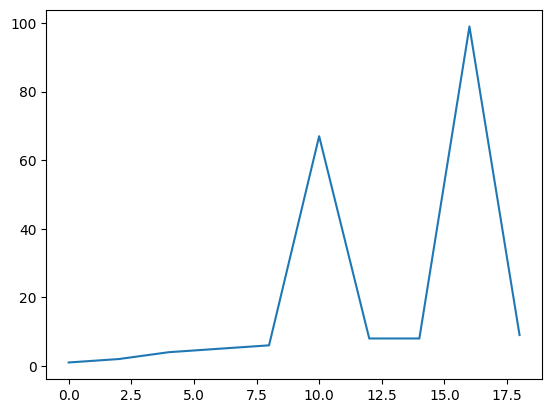

In [5]:
a = [1, 2, 4, 5, 6, 67, 8, 8, 99, 9]
import matplotlib.pyplot as plt 
plt.plot([i for i in range(0, len(a)*2, 2) ], a)

In [10]:
for i in range(len(image_path_list)):
    print(rbg_to_gray(i))


(0, 0, 0)
./images\Frame 1  (10).jpg___fuse.png
(0, 0, 0)
./images\Frame 1  (100).jpg___fuse.png
(0, 0, 0)
./images\Frame 1  (11).jpg___fuse.png
(0, 0, 0)
./images\Frame 1  (12).jpg___fuse.png
(0, 0, 0)
./images\Frame 1  (13).jpg___fuse.png

(0, 0, 0)
./images\Frame 1  (15).jpg___fuse.png
(0, 0, 0)
./images\Frame 1  (16).jpg___fuse.png
(0, 0, 0)
./images\Frame 1  (17).jpg___fuse.png
(0, 0, 0)
./images\Frame 1  (18).jpg___fuse.png
(0, 0, 0)
./images\Frame 1  (19).jpg___fuse.png

(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0, 0)
(0, 0,

In [22]:
import cv2 
a = cv2.imread('./masks/Frame 1  (1).jpg___fuse.png', 0)
a.shape

(1080, 1920)

In [23]:
a.min(), a.max()

(1, 6)

# checking the distribution of the classes

In [83]:
import cv2 
import glob 
import numpy as np 
new_mask_path_list = glob.glob('./masks/*__fuse.png')

In [84]:
h_stack = []
for i in range(len(new_mask_path_list)):
    h_stack.append(cv2.imread(new_mask_path_list[i], 0))

In [85]:
a = np.hstack(h_stack)

In [86]:
a = a.reshape(-1)

In [87]:
len(a)

207360000

In [88]:
color_dict = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:0,
    5:0,
    6:0,
    7:0,
    8:0,
    9:0,
}
class_object_mapping = {
    0 :  "ground",
    1 :  "advertisement",
    2 :  "audience",
    3 :  "football post",
    4 :  "team A", # orange | goal keeper in green of MU
    5 :  "goal keeper A", # green of MU keeper
    6 :  "team B", # yellow | goal keeper in yellow of RMA
    7 :  "goal keeper B", # in yellow of RMA
    8 :  "refree", # pink
    9 :  "football",
}

for key, value in color_dict.items():
    color_dict[key] = len(a[a == key])
    print(f"Class {class_object_mapping[key]} : {(color_dict[key] / len(a) * 100):.3f}%")

Class ground : 40.522%
Class advertisement : 15.647%
Class audience : 25.062%
Class football post : 1.444%
Class team A : 8.148%
Class goal keeper A : 0.563%
Class team B : 7.017%
Class goal keeper B : 1.106%
Class refree : 0.377%
Class football : 0.114%


In [89]:
color_dict

{0: 84027436,
 1: 32445214,
 2: 51969389,
 3: 2993567,
 4: 16896378,
 5: 1167789,
 6: 14549699,
 7: 2294156,
 8: 780756,
 9: 235616}

In [90]:
import pandas as pd 
colors_df = pd.DataFrame({'objects' : class_object_mapping, 'count': color_dict})

In [91]:
colors_df

,objects,count
0,ground,84027436
1,advertisement,32445214
2,audience,51969389
3,football post,2993567
4,team A,16896378
5,goal keeper A,1167789
6,team B,14549699
7,goal keeper B,2294156
8,refree,780756
9,football,235616


<Axes: xlabel='objects'>

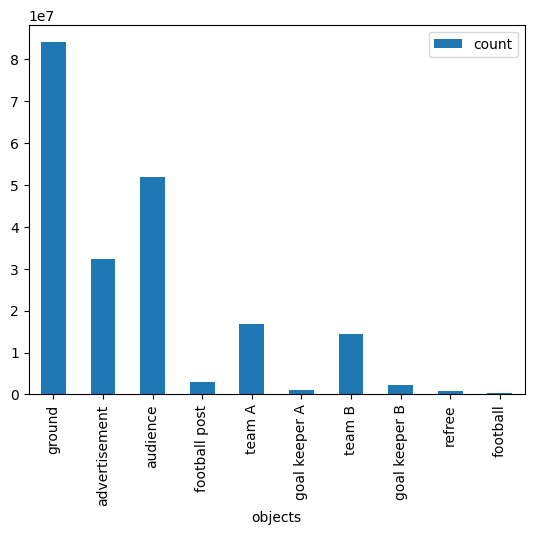

In [92]:
colors_df.plot.bar(x='objects', y='count')

Class ground : 40.522%
Class advertisement : 15.647%
Class audience : 25.062%
Class football post : 1.444%
Class team A : 8.148%
Class goal keeper A : 0.563%
Class team B : 7.017%
Class goal keeper B : 1.106%
Class refree : 0.377%
Class football : 0.114%

from the graph and above distribution, it can be found that the `ground` has the highest data about 40% from the total images,  `audience` and `advertisement` being the second and third highest. The `Team A` and `Team B`covers 8% and 7% respectively (not counting the goal keeper). The other class had equal or less than 1% presence in the total dataset.   


### finding the class weights to balance the dataset

#### based on the pixel values

calculating inverse class frequency

In [95]:
total_samples = len(a)
class_weights = []
for key, value in color_dict.items():
    color_dict[key] = len(a[a == key])
    print(f"Class {class_object_mapping[key]} :  weight: { (1 /(color_dict[key] / total_samples)):.3f}")
    class_weights.append((1 /(color_dict[key] / total_samples)))

Class ground :  weight: 2.468
Class advertisement :  weight: 6.391
Class audience :  weight: 3.990
Class football post :  weight: 69.269
Class team A :  weight: 12.272
Class goal keeper A :  weight: 177.566
Class team B :  weight: 14.252
Class goal keeper B :  weight: 90.386
Class refree :  weight: 265.589
Class football :  weight: 880.076


In [96]:
[x for x in class_weights]

[2.4677654093836683,
 6.39108128551718,
 3.990041137485761,
 69.26853482818323,
 12.272452711462776,
 177.56632405340346,
 14.251841223656928,
 90.3861812361496,
 265.5887370702243,
 880.076055955453]